In [ ]:
import scipy.special as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss

In [ ]:
# fix random seed for reproducibility
np.random.seed(5)

In [ ]:
class NeuralNetwork:
  def _init_ (self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    self.i_nodes = input_nodes
    self.h_nodes = hidden_nodes 
    self.o_nodes = output_nodes
    self.wih = np.random.normal(0.0, pow(self.h_nodes, -0.5), (self.h_nodes, self.i_nodes)) 
    self.who = np.random.normal(0.0, pow(self.o_nodes, -0.5), (self.o_nodes, self.h_nodes)) 
    self.lr = learning_rate
    self.activation_function = lambda x: ss.expit(x)
  def train(self, inputs_list, targets_list):
   inputs_array = np.array(inputs_list, ndmin=2).T 
   targets_array = np.array(targets_list, ndmin=2).T
   hidden_inputs = np.dot(self.wih, inputs_array)
   hidden_outputs = self.activation_function(hidden_inputs)
   final_inputs = np.dot(self.who, hidden_outputs) 
   final_outputs = self.activation_function(final_inputs)
   output_errors = targets_array - final_outputs 
   hidden_errors = np.dot(self.who.T, output_errors)
   self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),np.transpose(hidden_outputs))
   self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),np.transpose(inputs_array))
  def query(self, inputs_list):
    inputs_array = np.array(inputs_list, ndmin=2).T
    hidden_inputs = np.dot(self.wih, inputs_array)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs =self.activation_function(final_inputs)
    return final_outputs


In [ ]:
for k in [0.03,0.05,0.07,0.09,0.13,0.17,0.2,0.25]:
  El = NeuralNetwork()
  El._init_(784,800,10,k)#changing parameters in the experiment
  output_nodes=10
  training_data_file = open("/content/drive/MyDrive/Coursework_A/fashion_MNIST/fashion_mnist_train.csv", 'r') 
  training_data_list = training_data_file.readlines() 
  training_data_file.close()
# Train the neural network on each trainingsample 
  for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    El.train(inputs, targets)
    pass
  test_data_file = open("/content/drive/MyDrive/Coursework_A/fashion_MNIST/fashion_mnist_test.csv", 'r') 
  test_data_list = test_data_file.readlines() 
  test_data_file.close() 
  scorecard = []
  for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0]) 
  #print(correct_label, "Correct label") 
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
    outputs = El.query(inputs)
    label = np.argmax(outputs)
  #print(label, "Network label",'\n') 
    if (label == correct_label):
      scorecard.append(1)
    else:
        scorecard.append(0)
    pass
  pass
  scorecard_array = np.asarray(scorecard)
  print((scorecard_array.sum() / scorecard_array.size)*100, ',')

83.7 ,
84.11 ,
83.64 ,
82.87 ,
82.12 ,
78.33 ,
73.00999999999999 ,


KeyboardInterrupt: ignored

In [17]:
data_file = open("/content/drive/MyDrive/Coursework_A/fashion_MNIST/fashion_mnist_train_1000.csv", 'r')
data_list = data_file.readlines()
data_file.close()
for j in data_list:
  all_values = j.split(',')
  image_array = np.asfarray(all_values[1:]).reshape((28, 28))
  plt.imshow(image_array, cmap='PuBuGn', interpolation='None')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
np.random.seed(42)
for k in [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,2000]:
  El = NeuralNetwork()
  El._init_(784,k,10,0.02)#changing parameters in the experiment
  output_nodes=10
  training_data_file = open("/content/drive/MyDrive/Coursework_A/MNIST/mnist_train_100.csv", 'r') 
  training_data_list = training_data_file.readlines() 
  training_data_file.close()
# Train the neural network on each trainingsample 
  for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    El.train(inputs, targets)
    pass
  test_data_file = open("/content/drive/MyDrive/Coursework_A/MNIST/mnist_test_10.csv", 'r') 
  test_data_list = test_data_file.readlines() 
  test_data_file.close() 
  scorecard = []
  for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0]) 
  #print(correct_label, "Correct label") 
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
    outputs = El.query(inputs)
    label = np.argmax(outputs)
  #print(label, "Network label",'\n') 
    if (label == correct_label):
      scorecard.append(1)
    else:
        scorecard.append(0)
    pass
  pass
  scorecard_array = np.asarray(scorecard)
  print((scorecard_array.sum() / scorecard_array.size)*100)

40.0
50.0
40.0
70.0
60.0
60.0
60.0
70.0
70.0
40.0
70.0
60.0
60.0
70.0


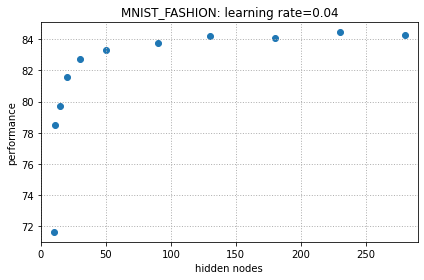

In [ ]:
y=[71.65,78.52,79.71,81.54,82.73,83.32,83.75,84.22,84.04,84.43,84.27]
x=[10,11,15,20,30,50,90,130,180,230,280]
plt.scatter(x,y)
plt.xlim([x[0]-10, x[-1] + 10])
plt.xlabel("hidden nodes")
plt.ylabel("performance")
plt.title("MNIST_FASHION: learning rate=0.04")
plt.grid(True, linewidth=1, linestyle=':')
plt.tight_layout()
plt.show()

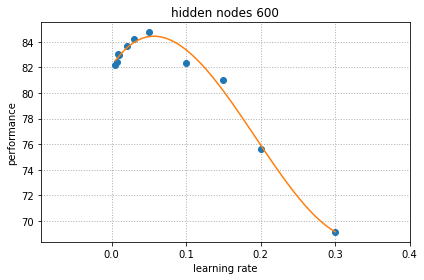

In [ ]:
x=[0.005,0.007,0.009,0.01,0.02,0.03,0.05,0.1,0.15,0.2,0.3]
y=[82.19,82.44,83.04,82.96,83.67999999999999,84.17999999999999,84.73,82.34, 81.03,75.63, 69.17999999999999]
z = np.polyfit(x, y, 3)
f = np.poly1d(z)
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-0.1, x[-1] + 0.1 ])
plt.xlabel("learning rate")
plt.ylabel("performance")
plt.title("hidden nodes 600")
plt.grid(True, linewidth=1, linestyle=':')
plt.tight_layout()
plt.show()

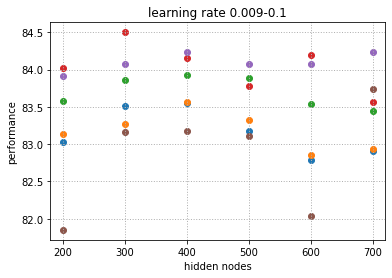

In [ ]:
x_lr=[0.009,
0.009,
0.009,
0.009,
0.009,
0.009,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.02,
0.02,
0.02,
0.02,
0.02,
0.02,
0.03,
0.03,
0.03,
0.03,
0.03,
0.03,
0.05,
0.05,
0.05,
0.05,
0.05,
0.05,
0.1,
0.1,
0.1,
0.1,
0.1,
0.1]
y_perform=[[83.03,
83.51,
83.55,
83.18,
82.79,
82.91],
[83.13,
83.27,
83.57,
83.32,
82.86,
82.93],
[83.58,
83.86,
83.93,
83.89,
83.54,
83.44],
[84.02,
84.5,
84.15,
83.78,
84.19,
83.56],
[83.92,
84.08,
84.24,
84.08,
84.08,
84.24],
[81.85,
83.16,
83.18,
83.11,
82.04,
83.74]]
x_hn=[200,
300,
400,
500,
600,
700]
for i in [0,1,2,3,4,5]:
 plt.scatter(x_hn,y_perform[i])
 plt.xlim([x_hn[0]-20, x_hn[-1] + 20 ])
 plt.xlabel("hidden nodes")
 plt.ylabel("performance")
 plt.title("learning rate 0.009-0.1")
 plt.grid(True, linewidth=1, linestyle=':')
plt.show()
